In [1]:
##Import all necessary packages
#general utility
import pandas as pd
import numpy as np
import sklearn
import csv
import matplotlib.pyplot as plt 
import importlib 
importlib.reload(util)

#necessary for specific lenses
from sklearn import ensemble  
from sklearn.decomposition import PCA 

#WLCF, KeplerMapper, and Mapper_Plus
import mapper_plus as mp 
import kmapper as km 
import walk_likelihood as wl
importlib.reload(mp)

KeplerMapper(verbose=1)
KeplerMapper(verbose=1)


<module 'mapper_plus' from "/Users/esha/Library/CloudStorage/Box-Box/Modelers' Interesting Stuff/Codes/mapper_plus.py">

## First Dataset: Abalone
The abalone dataset (https://archive.ics.uci.edu/ml/datasets/abalone) is a publicly available dataset with 4177 observations and 8 parameters. For the purpose of this example, we have provided a version of the dataset with all observations converted to z-scores.

In [2]:
#Load in dataset
X=np.load('Abalone_standardized.npy')
X.shape  #needs to be n_observations x n_parameters

(4177, 8)

In [3]:
## Define some lenses: we may not use all in analysis, but let's demonstrate some options
mapper = km.KeplerMapper(verbose=1)
lens1 = mapper.fit_transform(X,projection=PCA(n_components=2))
lens2 = mapper.fit_transform(X,projection='l2norm')
isomodel = ensemble.IsolationForest(random_state=1729)
isomodel.fit(X)
lens3 = isomodel.decision_function(X).reshape((X.shape[0], 1))

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: PCA(n_components=2)
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (4177, 8)

..Projecting data using: 
	PCA(n_components=2)


..Scaling with: MinMaxScaler()

..Composing projection pipeline of length 1:
	Projections: l2norm
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (4177, 8)

..Projecting data using: l2norm

..Scaling with: MinMaxScaler()



In [4]:
##Define a cover
#This hepler class comes from KeplerMapper and defines the covering scheme 
#Different choices of n_cubes (resolution) and perc_overlaping (gain) will give you different clustering results
cover = km.Cover(n_cubes = 10, perc_overlap = 0.7)

In [5]:
##Call Mapper Plus to get our clusters
model=mp.mapper_plus()
model.get_mapper_graph(lens2,X,cover=cover,clusterer=sklearn.cluster.KMeans(n_clusters=2, random_state=1618033),)
model.get_overlapping_clusters()
model.get_non_overlapping_clusters()

Mapping on data shaped (4177, 8) using lens shaped (4177, 1)

Creating 10 hypercubes.

Created 17 edges and 10 nodes in 0:00:00.285916.
We found 3 overlapping clusters
We found 3 non-overlapping clusters


In [7]:
#We can view which observations are in which clusters
list_of_obvs = model.overlapping_clusters

## Second Dataset: Wine
The wine dataset (https://archive.ics.uci.edu/ml/datasets/wine) is a publicly available dataset with 178 wines and 13 parameters plus an additional wine class assignment. For this example, we load in a version of the wine dataset (without classes) that has been converted to z-scores and the classes separately. We can use the classes to test out different lenses.

In [8]:
#Load in dataset
X=np.load('winestandardized.npy')
y = np.load('wineclasses.npy')
X.shape  #needs to be n_observations x n_parameters

(178, 13)

In [9]:
## Define some lenses: we may not use all in analysis, but let's demonstrate some options
mapper = km.KeplerMapper(verbose=1)
lens1 = mapper.fit_transform(X,projection=PCA(n_components=1))
lens2 = mapper.fit_transform(X,projection='l2norm')
isomodel = ensemble.IsolationForest(random_state=1729)
isomodel.fit(X)
lens3 = isomodel.decision_function(X).reshape((X.shape[0], 1))

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: PCA(n_components=1)
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (178, 13)

..Projecting data using: 
	PCA(n_components=1)


..Scaling with: MinMaxScaler()

..Composing projection pipeline of length 1:
	Projections: l2norm
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (178, 13)

..Projecting data using: l2norm

..Scaling with: MinMaxScaler()



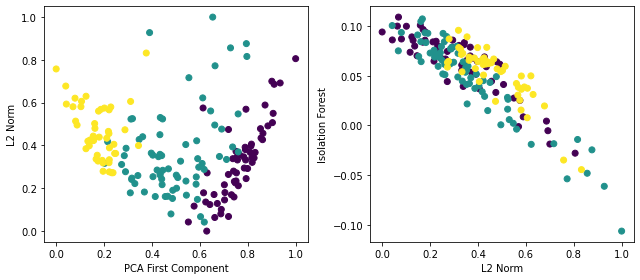

In [10]:
##This is a version of the 'Choosing a Lens' code from the Kepler Mapper docmentation that is really helpful 
##The keplermapper version can be found here: https://kepler-mapper.scikit-tda.org/en/latest/notebooks/Cancer-demo.html

fig, axs = plt.subplots(1,2, figsize=(9,4))
axs[0].scatter(lens1,lens2, c = y.reshape(-1,1), alpha=1)
axs[0].set_xlabel('PCA First Component')
axs[0].set_ylabel('L2 Norm')

axs[1].scatter(lens2,lens3, c = y.reshape(-1,1), alpha=1)
axs[1].set_xlabel('L2 Norm')
axs[1].set_ylabel('Isolation Forest')

plt.tight_layout()
plt.show()

We can see that the classes of wines are better separated using the PCA First Component and L2 norm than they are using L2 Norm and Isolation Forest. In fact, the shape of the L2 norm x Isolation Forest plot shows that the two lenses we are using provide more or less the same information. Given that we're interested in lenses that separate our classes, we may prefer the first pair of lenses over the second. 

In [11]:
#Since we've determined which two lenses we'll use, let's concatenate them into one 2-D lens
lens = np.c_[lens1, lens2]

In [12]:
##Define a cover
cover = km.Cover(n_cubes = 6, perc_overlap = 0.6)

In [13]:
##Call Mapper Plus to get our clusters
model=mp.mapper_plus()
model.get_mapper_graph(lens,X,cover=cover,clusterer=sklearn.cluster.KMeans(n_clusters=2, random_state=1618033),)
model.get_overlapping_clusters()
model.get_non_overlapping_clusters()

Mapping on data shaped (178, 13) using lens shaped (178, 2)

Creating 36 hypercubes.

Created 520 edges and 70 nodes in 0:00:01.382319.
We found 4 overlapping clusters
We found 4 non-overlapping clusters
